In [30]:
RED  = '#C82506'
BLUE = '#0365C0'
GREEN = '#00882B'
ORANGE = '#DE6A10'
PURPLE = '#773F9B'
YELLOW = '#DCBD23'

import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def clean(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
def ca(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off', top='off', right='off', left='off',
    labelbottom='off', labelleft='off') # labels along the bottom edge are off
    

def center(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    ax.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelbottom='off', labelleft='off')
    
    ax.set_aspect('equal')
    


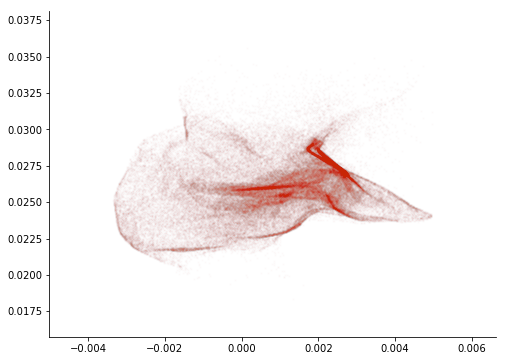

In [45]:
# good seeds: 60

np.random.seed(60)

import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(100, input_dim=2, activation='sigmoid'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))

model.add(Dense(2))

n = 100000

x = np.random.randn(n, 2)
y = model.predict(x)

plt.figure(figsize=(8, 6))
plt.scatter(y[:, 0], y[:, 1], color=RED, s=2, alpha=0.01)
clean()

plt.savefig('random.pdf')

In [63]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
x = faces.data.reshape(400, 64, 64, 1)

x.shape

(400, 64, 64, 1)

In [60]:
from keras.layers import Input, Conv2D, Conv2DTranspose, Dense, Reshape, MaxPooling2D, UpSampling2D, Flatten
from keras.models import Model

hidden_size = 2

input = Input(shape=(64,64,1))

x = Conv2D(4, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1))(input)
x = MaxPooling2D((4, 4), padding='same')(x)
x = Conv2D(32, (4, 4), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (4, 4), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(hidden_size)(x)

encoder = Model(input, x)

encoder.summary()

encoded = Input(shape=(hidden_size,))

x = Dense(256)(encoded)
x = Reshape((4,4,16))(x)

x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (4, 4), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (4, 4), activation='relu', padding='same')(x)
x = UpSampling2D((4, 4))(x)
decoded = Conv2D(1, (4, 4), activation='sigmoid', padding='same')(x)

decoder = Model(encoded, decoded)

decoder.summary()

auto = Model(input, decoder(encoder(input)))

auto.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 64, 64, 4)         40        
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 4)         0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 8, 8, 64)          32832     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 4, 4, 64)          0         
__________

In [61]:
from keras.optimizers import SGD, Adam

auto.compile(optimizer='adam', loss='binary_crossentropy')

In [64]:
auto.fit(x, x, epochs=10, batch_size=256, shuffle=True)

Epoch 1/10
400/400 [==============================] - 25s - loss: 0.6923     
Epoch 2/10
400/400 [==============================] - 16s - loss: 0.6856    
Epoch 3/10
400/400 [==============================] - 15s - loss: 0.6830    
Epoch 4/10
400/400 [==============================] - 15s - loss: 0.6788    
Epoch 5/10
400/400 [==============================] - 17s - loss: 0.6754    
Epoch 6/10
400/400 [==============================] - 20s - loss: 0.6724    
Epoch 7/10
400/400 [==============================] - 21s - loss: 0.6708    
Epoch 8/10
400/400 [==============================] - 22s - loss: 0.6703    
Epoch 9/10
400/400 [==============================] - 22s - loss: 0.6689    
Epoch 10/10
400/400 [==============================] - 19s - loss: 0.6683    
